In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def get_cost(x, y, theta):
    h = np.matmul(x, theta)
    e = h - y
    m = x.shape[0]
    return (np.matmul(e.T, e) / (2 * m))[0][0]

def ridge_get_cost(x, y, theta, lamb):
    h = np.matmul(x, theta)
    e = h - y
    m = x.shape[0]
    return (np.matmul(e.T, e) + lamb * np.matmul(theta.T,theta))[0][0] / (2 * m)

def lasso_get_cost(x, y, theta, lamb):
    h = np.matmul(x, theta)
    e = h - y
    m = x.shape[0]
    return (np.matmul(e.T, e) )[0][0] + lamb * np.absolute(theta).sum() / (2 * m)


print(x.shape[1])
y = np.array(y).reshape(y.shape[0], 1)
theta = np.zeros(shape=(6, 1))
lamb = 0.05
print(get_cost(x, y, theta),ridge_get_cost(x, y, theta, lamb), lasso_get_cost(x, y, theta, lamb))

6
7484486563.788014 7484486563.788014 688572763868.4973


In [5]:
def gradient_descend(x, y, alpha, theta, iterations):
    cost = []
    m = x.shape[0]

    for i in range(iterations):
        e = np.matmul(x, theta) - y
        grad = np.matmul(x.T, e) / m
        theta = theta - alpha * grad
        
        cost.append(get_cost(x, y, theta))
        
    return cost, theta

def ridge_gradient_descend(x, y, alpha, lamb, theta, iterations):
    cost = []
    m = x.shape[0]

    for i in range(iterations):
        e = np.matmul(x, theta) - y
        theta1 = theta
        theta1[0] = 0
        grad = (np.matmul(x.T, e) + lamb * theta1) / m 
        theta = theta - alpha * grad
        
        cost.append(ridge_get_cost(x, y, theta, lamb))
        
    return cost, theta

def lasso_gradient_descend(x, y, alpha, lamb, theta, iterations):
    cost = []
    m = x.shape[0]

    for i in range(iterations):
        e = np.matmul(x, theta) - y
        theta1 = theta
        theta1[0] = 0
        grad = (np.matmul(x.T, e) + lamb * np.sign(theta1)) / m
        theta = theta - alpha * grad
        
        cost.append(lasso_get_cost(x, y, theta, lamb))
        
    return cost, theta

28203231.48055267
46380076.80588532


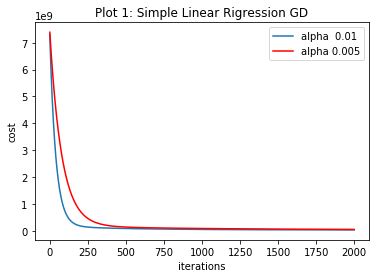

In [7]:

plt.xlabel('iterations')
plt.ylabel('cost')
plt.title("Plot 1: Simple Linear Rigression GD")
plt.plot(cost1, label='alpha  0.01')
plt.plot(cost2, 'r', label='alpha 0.005')
plt.legend()
plt.plot()

print(cost1[-1])
print(cost2[-1])



2235844894.6480293


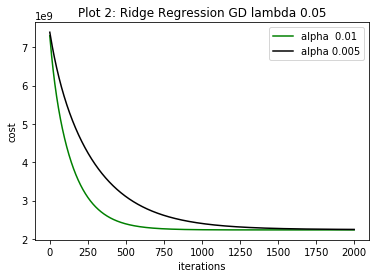

In [8]:
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title("Plot 2: Ridge Regression GD lambda 0.05")
plt.plot(cost3,'g', label='alpha  0.01')
plt.plot(cost4, 'k', label='alpha 0.005')
plt.legend()
plt.plot()

print(cost3[-1])

204280037400.1976


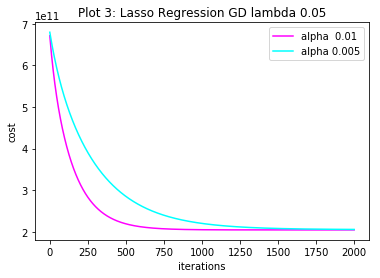

In [9]:
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title("Plot 3: Lasso Regression GD lambda 0.05")
plt.plot(cost5, 'magenta',label='alpha  0.01')
plt.plot(cost6, 'cyan', label='alpha 0.005')
plt.legend()
plt.plot()

print(cost5[-1])

# Simple GD

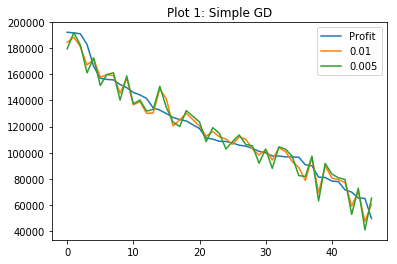

In [11]:
plt.title("Plot 1: Simple GD")
plt.plot(data['Profit'],label='Profit')
plt.plot(data['GD 0.01'],label='0.01')
plt.plot(data['GD 0.005'],label='0.005')
plt.legend()

# Ridge GD

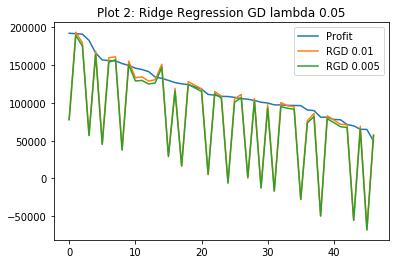

In [12]:
plt.title("Plot 2: Ridge Regression GD lambda 0.05")
plt.plot(data['Profit'],label='Profit')
plt.plot(data['RGD0.01'],label='RGD 0.01')
plt.plot(data['RGD0.005'],label='RGD 0.005')
plt.legend()

# Lasso GD

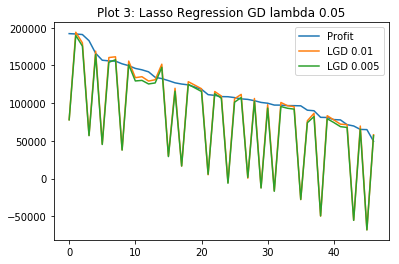

In [13]:
plt.title("Plot 3: Lasso Regression GD lambda 0.05")

plt.plot(data['Profit'],label='Profit')
plt.plot(data['LGD 0.01'],label='LGD 0.01')
plt.plot(data['LGD 0.005'],label='LGD 0.005')
plt.legend()

# Comparison

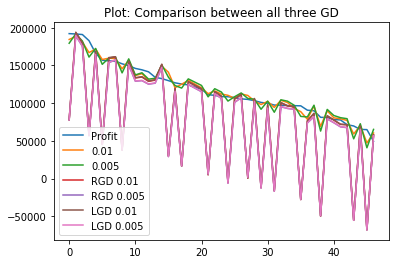

In [14]:
plt.title("Plot: Comparison between all three GD")
plt.plot(data['Profit'],label='Profit')
plt.plot(data['GD 0.01'],label='0.01')
plt.plot(data['GD 0.005'],label='0.005')

plt.plot(data['RGD0.01'],label='RGD 0.01')
plt.plot(data['RGD0.005'],label='RGD 0.005')

plt.plot(data['LGD 0.01'],label='LGD 0.01')
plt.plot(data['LGD 0.005'],label='LGD 0.005')

plt.legend()